In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import pickle
from sklearn.decomposition import PCA
def save_data(X : pd.DataFrame, path:str):
    X.to_csv(path+".csv")
    X.to_excel(path+".xlsx")

In [2]:
df = pd.read_csv("Datas/cleared_data.csv")
df

,"('N', 'O', 2)","('P', 'O', 2)","('O', 'S', 1)","('C', 'O', 1)","('C', 'O', 1.5)","('I', 'C', 1)","('C', 'N', 3)","('O', 'O', 1)","('N', 'Cl', 1)","('N', 'H', 1)",...,"('N', 'O', 1)","('O', 'C', 2)","('N', 'N', 2)","('P', 'H', 1)","('P', 'S', 1)","('Cl', 'C', 1)","('C', 'C', 2)","('C', 'H', 1)","('O', 'H', 1)","('S', 'S', 1)"
0,0,0,0,1,0,0,2,0,0,1,...,0,1,0,0,0,1,1,17,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,21,1,0
2,0,0,0,0,0,0,0,0,0,4,...,0,1,0,0,0,0,0,16,0,0
3,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,23,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0,0,0,2,2,0,0,0,0,1,...,0,0,0,0,0,2,0,21,0,0
62083,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,18,0,0
62084,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,27,0,0
62085,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,31,0,0


In [3]:
X = df.values
pca = PCA(n_components=3)
pca.fit(X)
transformed_data = pca.transform(X)
pca.inverse_transform(transformed_data)

array([[ 2.55112165e-02,  1.19157972e-03,  2.30783171e-03, ...,
         1.85483038e+01,  3.07274937e-01,  3.57578106e-04],
       [ 2.23043379e-02,  1.00269188e-03,  1.48469075e-03, ...,
         2.00000667e+01,  2.03011840e-01,  3.61095625e-04],
       [ 2.25386394e-02,  1.67044194e-03,  1.40628721e-03, ...,
         1.70107140e+01,  7.50912577e-02,  7.74942572e-04],
       ...,
       [ 9.94923090e-03, -2.34837628e-04,  1.70710604e-04, ...,
         2.75256444e+01,  2.07508805e-01, -2.24185679e-04],
       [-1.41419963e-02, -1.25791457e-04, -1.41924627e-04, ...,
         3.05778857e+01,  1.71795185e-01, -2.07570839e-04],
       [ 3.40623464e-02,  1.01014594e-03,  1.94778098e-03, ...,
         1.81845722e+01,  2.63418812e-01,  3.40388693e-04]])

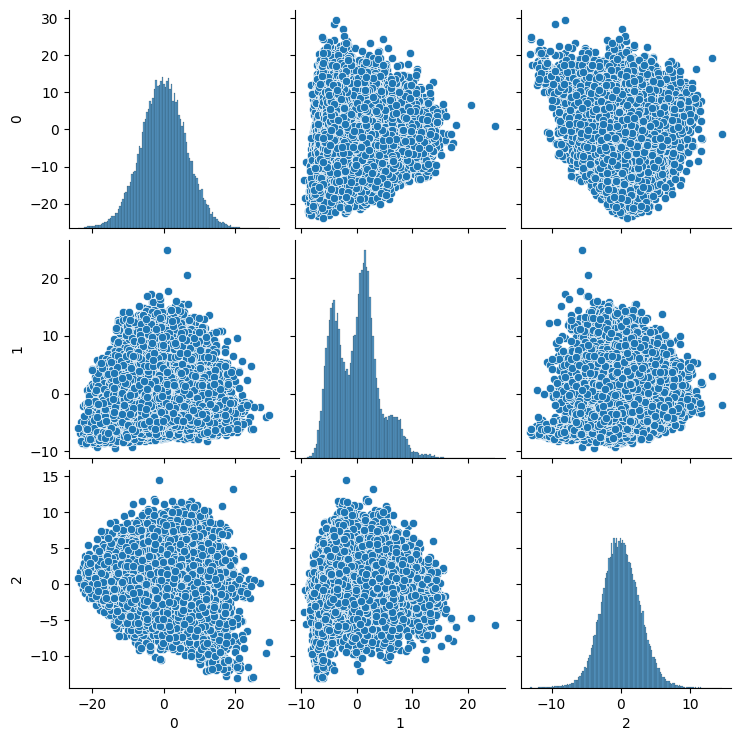

In [4]:
sns.pairplot(pd.DataFrame(transformed_data))

In [5]:
pd.DataFrame(transformed_data).to_csv("Datas/pca_data.csv", index=False)
# Save to file in the current working directory
pkl_filename = "models/pca_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pca, file)